# Spotify Music Recommendation

## Importing modules

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from sklearn.cluster import KMeans 

## Loading data 

In [12]:
df = pd.read_csv('data/data_o.csv')

## Representing data as histogram

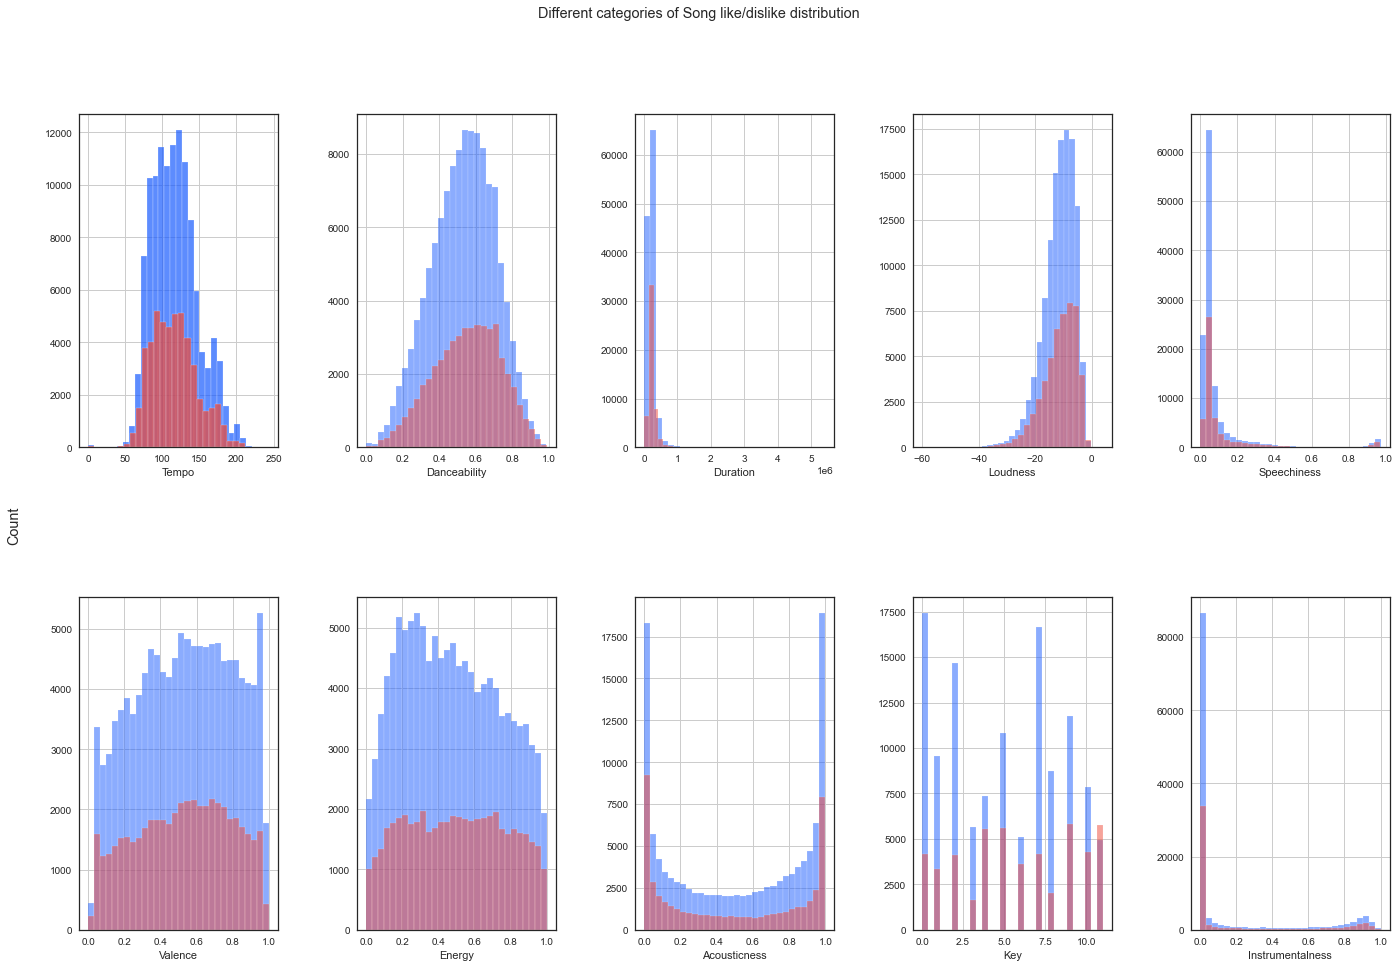

In [13]:
def showHisto():
    data = df
    red_blue=['#195BFE','#EF4836']
    palette=sns.color_palette(red_blue)
    sns.set_palette(palette)
    sns.set_style("white")
    pos_tempo = data[data['mode'] ==1]['tempo']
    neg_tempo = data[data['mode'] ==0]['tempo']
    pos_dance = data[data['mode'] ==1]['danceability']
    neg_dance = data[data['mode'] ==0]['danceability']
    pos_duration = data[data['mode'] ==1]['duration_ms']
    neg_duration = data[data['mode'] ==0]['duration_ms']
    pos_loudness = data[data['mode'] ==1]['loudness']
    neg_loudness = data[data['mode'] ==0]['loudness']
    pos_speechiness = data[data['mode'] ==1]['speechiness']
    neg_speechiness = data[data['mode'] ==0]['speechiness']
    pos_valence = data[data['mode'] ==1]['valence']
    neg_valence = data[data['mode'] ==0]['valence']
    pos_energy = data[data['mode'] ==1]['energy']
    neg_energy = data[data['mode'] ==0]['energy']
    pos_acousticness = data[data['mode'] ==1]['acousticness']
    neg_acousticness = data[data['mode'] ==0]['acousticness']
    pos_key = data[data['mode'] ==1]['key']
    neg_key = data[data['mode'] ==0]['key']
    pos_instrumentalness = data[data['mode'] ==1]['instrumentalness']
    neg_instrumentalness = data[data['mode'] ==0]['instrumentalness']
    fig = plt.figure(figsize=(20,15))
    #Tempo 
    ax1=fig.add_subplot(251)
    pos_tempo.hist(alpha = 0.7, bins = 30, label = 'positive')
    neg_tempo.hist(alpha = 0.7, bins = 30, label = 'negative')
    ax1.set_xlabel('Tempo')
    #Danceability
    ax2=fig.add_subplot(252)
    pos_dance.hist( alpha=0.5, bins=30)
    neg_dance.hist( alpha=0.5, bins=30)
    ax2.set_xlabel('Danceability')
    #Duration
    ax3=fig.add_subplot(253)
    pos_duration.hist(alpha=0.5, bins=30)
    neg_duration.hist(alpha=0.5, bins=30)
    ax3.set_xlabel('Duration')
    #Loudness
    ax4=fig.add_subplot(254)
    pos_loudness.hist(alpha=0.5, bins=30)
    neg_loudness.hist(alpha=0.5, bins=30)
    ax4.set_xlabel('Loudness')
    #Speechiness
    ax5=fig.add_subplot(255)
    pos_speechiness.hist(alpha=0.5, bins=30)
    neg_speechiness.hist(alpha=0.5, bins=30)
    ax5.set_xlabel('Speechiness')
    #Valence
    ax6=fig.add_subplot(256)
    pos_valence.hist(alpha=0.5, bins=30)
    neg_valence.hist(alpha=0.5, bins=30)
    ax6.set_xlabel('Valence')
    #Energy
    ax7=fig.add_subplot(257)
    pos_energy.hist(alpha=0.5, bins=30)
    neg_energy.hist(alpha=0.5, bins=30)
    ax7.set_xlabel('Energy')
    #Acousticness
    ax8=fig.add_subplot(258)
    pos_acousticness.hist(alpha=0.5, bins=30)
    neg_acousticness.hist(alpha=0.5, bins=30)
    ax8.set_xlabel('Acousticness')
    #Key
    ax9=fig.add_subplot(259)
    pos_key.hist(alpha=0.5, bins=30)
    neg_key.hist(alpha=0.5, bins=30)
    ax9.set_xlabel('Key')
    #Instrumentalness
    ax10=fig.add_subplot(2,5,10)
    pos_instrumentalness.hist(alpha=0.5, bins=30)
    neg_instrumentalness.hist(alpha=0.5, bins=30)
    ax10.set_xlabel('Instrumentalness')
    fig.supylabel('Count')
    fig.suptitle('Different categories of Song like/dislike distribution')
    plt.subplots_adjust(hspace=0.45,wspace=0.4,left=0.07,right=0.98)
    plt.show()
showHisto()

## Removing brackets and apostrophe

In [14]:
df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")

## Normalizing column in the dataframe which needs to be normalized

In [15]:
def normalize_column(col):
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)

## Normalizing allnumerical columns so that min value is 0 and max value is 1

In [16]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

## Performing Kmeans Clustering

In [17]:
km = KMeans(n_clusters=25)
pred = km.fit_predict(num)
df['pred'] = pred
normalize_column('pred')

## Song Recommender

In [18]:
class Song_Recommender():
    def __init__(self, data):
        self.data_ = data
    def get_recommendations(self, song_name, n_top):
        distances = []
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                if not col in [3,8,14,16]:
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name','id']
        return rem_data[columns][:n_top]

## Instantiating recommender class

In [19]:
recommender = Song_Recommender(df)
recommender.get_recommendations('Blinding Lights', 10)

100%|███████████████████████████████████████████████████████████████████████| 170652/170652 [00:08<00:00, 19881.50it/s]


,artists,name,id
18039,One Direction,They Don't Know About Us,6M31fPFCYB8Job3MCjjrDV
91872,"""Why Dont We""",Hooked,2N2s2s2w0jmSIPNZcm8Jnr
38139,Simple Plan,I'm Just a Kid,6otiaV2fagE3s8IvP6WkwG
108591,NF,No Excuses,7ssFG94tZHpX9vbIFM0GVH
155439,"Gryffin, John Martin",Cry (with John Martin),1TF8rXy87zrnpBlS9TLykA
37677,One Direction,Love You Goodbye,1ZWLWVqeEMWMKTlteS0yLH
124756,"Kygo, Sasha Sloan",I'll Wait,6Q3K9gVUZRMZqZKrXovbM2
19401,Mitchell Tenpenny,Drunk Me,1G4cdOtF36ZCs6i2dZoC87
56288,Breaking Benjamin,Failure,4wh0E9OwMCxcaIKTg0Mts9
56092,Sabaton,To Hell and Back,1BrgjqSg9du0lj3TUMLluL
